In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
from sklearn import datasets

In [3]:
# Configure matplotlib style
sns.set()
plt.style.use('ggplot')

In [4]:
# Load a dummy dataset
mpg = sns.load_dataset('mpg')

# Set years as datetime
mpg['model_year'] = pd.to_datetime(mpg['model_year'].apply(lambda x: f'19{x}'))

# Car company 
mpg['company'] = mpg['name'].apply(lambda x: x.split(' ')[0])

# Remove car name
mpg.drop('name', axis=1, inplace=True)

In [5]:
# Display table
mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company
48,18.0,6,250.0,88.0,3139,14.5,1971-01-01,usa,ford
274,20.3,5,131.0,103.0,2830,15.9,1978-01-01,europe,audi
351,34.4,4,98.0,65.0,2045,16.2,1981-01-01,usa,ford
9,15.0,8,390.0,190.0,3850,8.5,1970-01-01,usa,amc
272,23.8,4,151.0,85.0,2855,17.6,1978-01-01,usa,oldsmobile


In [6]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [7]:
# Set datatypes
mpg = mpg.astype({'mpg': float, 'cylinders': int, 'displacement': float, 'horsepower': float, 'acceleration': float, 'origin': 'category', 'company': 'category'})

# Display info
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mpg           398 non-null    float64       
 1   cylinders     398 non-null    int32         
 2   displacement  398 non-null    float64       
 3   horsepower    392 non-null    float64       
 4   weight        398 non-null    int64         
 5   acceleration  398 non-null    float64       
 6   model_year    398 non-null    datetime64[ns]
 7   origin        398 non-null    category      
 8   company       398 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 22.8 KB


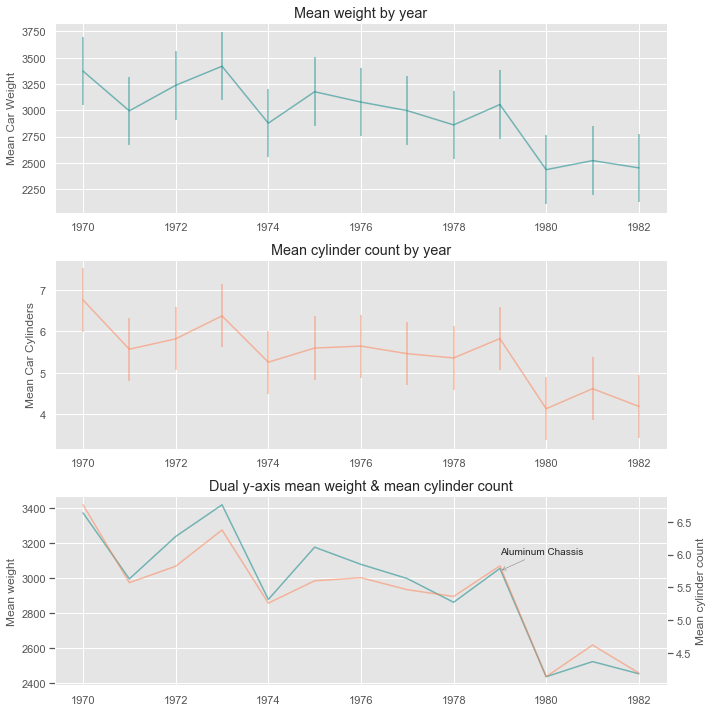

In [8]:
# Build a Twin axis dual plot
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Mean car weight by year
year_trends = mpg.groupby('model_year')[['weight', 'cylinders']].mean()

# Plot year vs mean weight and config axes
ax[0].errorbar(year_trends.index, year_trends['weight'], yerr=year_trends['weight'].std(), label='Mean Car Weight', alpha=0.5, color='#008080')
ax[0].set(ylabel='Mean Car Weight', title='Mean weight by year')

# Plot year vs mean weight and config axes
ax[1].errorbar(year_trends.index, year_trends['cylinders'], yerr=year_trends['cylinders'].std(), color='#FF7F50', label='Mean Car Cylinders', alpha=0.5)
ax[1].set(ylabel='Mean Car Cylinders', title='Mean cylinder count by year')

# Double Y-axis plot
ax[2].plot(year_trends.index, year_trends['weight'], label='Mean Car Weight', alpha=0.5, color='#008080')
ax[2].set(ylabel='Mean weight', title='Dual y-axis mean weight & mean cylinder count')

# Get a copy of x axis for a double y-axis plot
ax2 = ax[2].twinx()

# Plot year vs mean cylinder count and config axes
ax2.plot(year_trends.index, year_trends['cylinders'], color='#FF7F50', label='Mean Car Cylinders', alpha=0.5)
ax2.set(ylabel='Mean cylinder count')
ax2.grid(False)

# Annotate plot
ax2.annotate(
    "Aluminum Chassis",
    xy=(pd.Timestamp('1979'), 5.75),
    xytext=(pd.Timestamp('1979'), 6),
    arrowprops={'arrowstyle': '->', 'color': 'grey'})


# Display plot
plt.tight_layout()
plt.show()

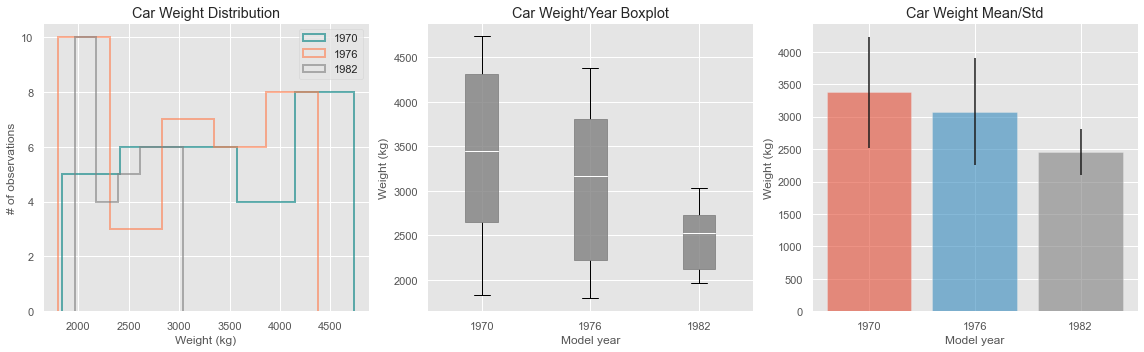

In [9]:
# Build a hollow histogram of weight the first and last year
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
colors = ['#008080', '#FF7F50', '#808080']

# Fiter datasets
weight_1970 = mpg[mpg['model_year'] == '1970']['weight']
weight_1982 = mpg[mpg['model_year'] == '1982']['weight']
weight_1976 = mpg[mpg['model_year'] == '1976']['weight']


# Plot hist of 1970
ax[0].hist(weight_1970, histtype='step', label='1970', bins=5, alpha=0.6, linewidth=2, color=colors[0])
ax[0].hist(weight_1976, histtype='step', label='1976', bins=5, alpha=0.6, linewidth=2, color=colors[1])
ax[0].hist(weight_1982, histtype='step', label='1982', bins=5, alpha=0.6, linewidth=2, color=colors[2])

# Boxplot
ax[1].boxplot([weight_1970, weight_1976, weight_1982], patch_artist=True, medianprops=dict(color='white'), boxprops=dict(facecolor='grey', color='gray', alpha=0.8))

# Mean/Std Bars
ax[2].bar("1970", weight_1970.mean(), yerr=weight_1970.std(), alpha=0.6)
ax[2].bar("1976", weight_1976.mean(), yerr=weight_1976.std(), alpha=0.6)
ax[2].bar("1982", weight_1982.mean(), yerr=weight_1982.std(), alpha=0.6, color='gray')

# Set axis labels and title
ax[0].set(xlabel='Weight (kg)', ylabel='# of observations', title='Car Weight Distribution')
ax[1].set(xticklabels=['1970', '1976', '1982'], ylabel='Weight (kg)', xlabel='Model year', title='Car Weight/Year Boxplot')
ax[2].set(xticklabels=['1970', '1976', '1982'], ylabel='Weight (kg)', xlabel='Model year', title='Car Weight Mean/Std')


# Add legend and display plot
ax[0].legend()
plt.tight_layout()
plt.show()

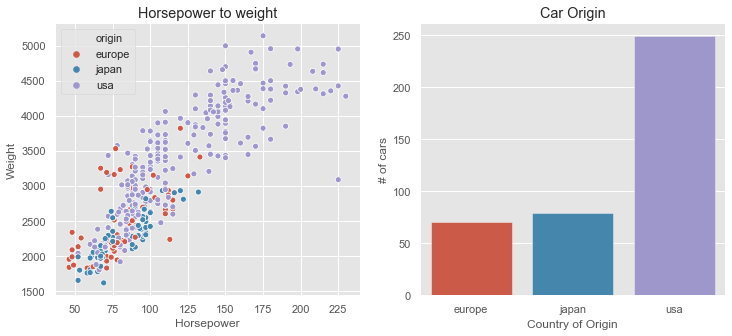

In [40]:
# Scatterplot of weight and cylinders
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
origin_color = {'usa': '#9E97CC', 'japan': '#4586AC', 'europe': '#CC5A49'}

# Plot yearly trend as a scatterplot
sns.scatterplot(x='horsepower', y='weight', hue='origin', hue_order=['europe', 'japan', 'usa'], data=mpg, ax=ax[0], palette=origin_color)
sns.countplot(x='origin', data=mpg, ax=ax[1])

# Configure plot
ax[0].set(xlabel='Horsepower', ylabel='Weight', title='Horsepower to weight')
ax[1].set(xlabel='Country of Origin', ylabel='# of cars', title='Car Origin')

# Show plot
plt.show()

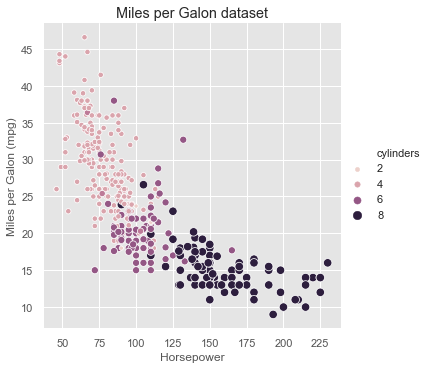

In [42]:
# Create scatter plot of horsepower vs. mpg
ax = sns.relplot(x="horsepower", y="mpg", data=mpg, kind="scatter",  size="cylinders", hue="cylinders")

# Set configuration
ax.set(xlabel='Horsepower', ylabel='Miles per Galon (mpg)', title='Miles per Galon dataset')

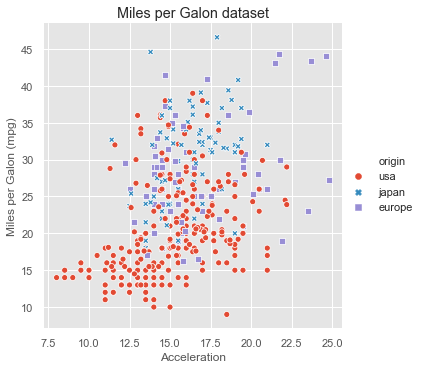

In [46]:
# Create a scatter plot of acceleration vs. mpg
ax = sns.relplot(x='acceleration', y='mpg', style='origin', data=mpg, kind='scatter', hue='origin')

# Set configuration
ax.set(xlabel='Acceleration', ylabel='Miles per Galon (mpg)', title='Miles per Galon dataset')

In [11]:
# New dataset for bar plotting (Medals)
olympics = pd.read_csv('datasets/olympics_toy.csv')

# Sample dataset
olympics.head(5)

,Country,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30


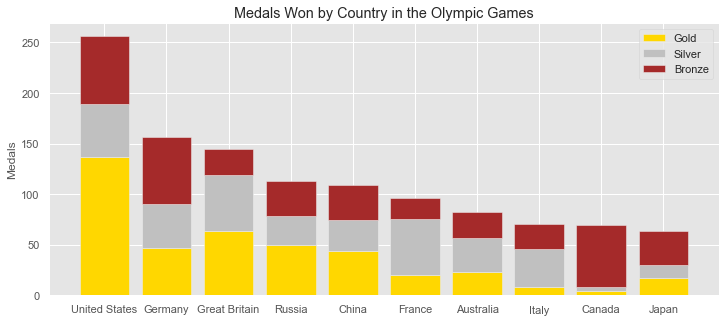

In [12]:
# Build figure
fig, ax = plt.subplots(figsize=(12, 5))

# Add data to axis
ax.bar(olympics['Country'], olympics['Gold'], label='Gold', color='gold')
ax.bar(olympics['Country'], olympics['Silver'], label='Silver', bottom=olympics['Gold'], color='silver')
ax.bar(olympics['Country'], olympics['Bronze'], label='Bronze', bottom=olympics['Gold'] + olympics['Silver'], color='brown')

# Set configuration
ax.set(title='Medals Won by Country in the Olympic Games', ylabel='Medals')

# Display legend and figure
plt.legend()
plt.show()

In [31]:
# Load iris dataset
exercise = sns.load_dataset('exercise', index_col=0)

In [32]:
# Show dataset
exercise.sample(5)

,id,diet,pulse,time,kind
75,26,no fat,95,1 min,running
16,6,no fat,83,15 min,rest
82,28,no fat,124,15 min,running
87,30,no fat,99,1 min,running
30,11,low fat,86,1 min,walking
